In [1]:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime
import pandas as pd

# Settings

In [2]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

## Read data

In [5]:
data_dir='/data/shareddata/Climatologias/cmems_mod_glo_phy_my_0.083_P1M-m/NC/'

In [6]:
files = []
for iy in range(2000,2021):
    for im in range(1,13):
        files.append(data_dir+"mercatorglorys12v1_gl12_mean_%04d%02d.nc"%(iy,im))

In [7]:
data = xr.open_mfdataset(files)

In [8]:
GL = data.drop_vars("mlotst").drop_vars("zos")
GL = GL.drop_vars("sithick").drop_vars("siconc")
GL = GL.drop_vars("usi").drop_vars("vsi").drop_vars("uo").drop_vars("vo").drop_vars("bottomT")

In [9]:
GL =  GL.rename({'longitude': 'lon','latitude': 'lat'})
GL

<xarray.Dataset> Size: 2TB
Dimensions:  (lon: 4320, lat: 2041, depth: 50, time: 252)
Coordinates:
  * lon      (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * lat      (lat) float32 8kB -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0
  * depth    (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T12:...
Data variables:
    thetao   (time, depth, lat, lon) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so       (time, depth, lat, lon) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

In [10]:
data=GL

In [16]:
data

<xarray.Dataset> Size: 2TB
Dimensions:  (lon: 4320, lat: 2041, depth: 50, time: 252)
Coordinates:
  * lon      (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * lat      (lat) float32 8kB -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0
  * depth    (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time     (time) datetime64[ns] 2kB 2000-01-16T12:00:00 ... 2020-12-16T12:...
Data variables:
    thetao   (time, depth, lat, lon) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
    so       (time, depth, lat, lon) float64 889GB dask.array<chunksize=(1, 7, 341, 720), meta=np.ndarray>
Attributes: (12/14)
    title:                         Monthly mean fields for product GLOBAL_REA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://marine.copernicus.eu/services-portf...
    contact:                       servicedesk.cmems@mercator-ocean.eu
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    ...                            ...
    area:                          GLOBAL
    product:                       GLOBAL_REANALYSIS_001_030
    dataset:                       global-reanalysis-001-030-monthly
    source:                        MERCATOR GLORYS12V1
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...

## Extract data

In [11]:
loni=-70
lonf=-23

In [12]:
data24N = data.interp(lat=[24.5], method="nearest").interp(lon=np.arange(loni,lonf,0.5), method="nearest").squeeze('lat').drop_vars('lat')

In [13]:
data24N_2000 = data24N.interp(depth = np.arange(10,1900,10), method="nearest")

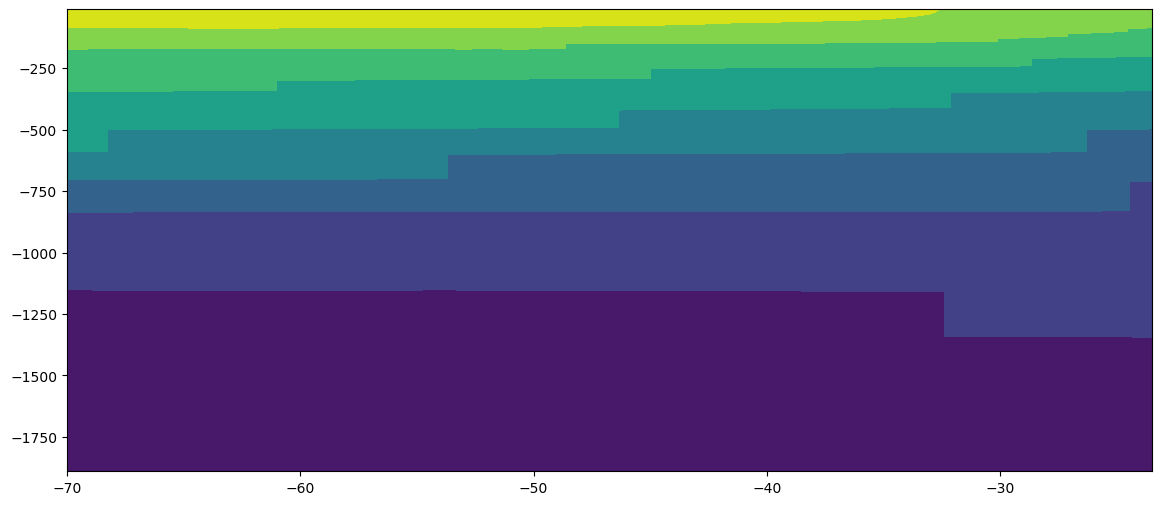

In [17]:
fig, ax = plt.subplots(figsize = (14,6))
ax.contourf(data24N_2000.thetao.lon,-data24N_2000.thetao.depth,data24N_2000.thetao.mean('time'))

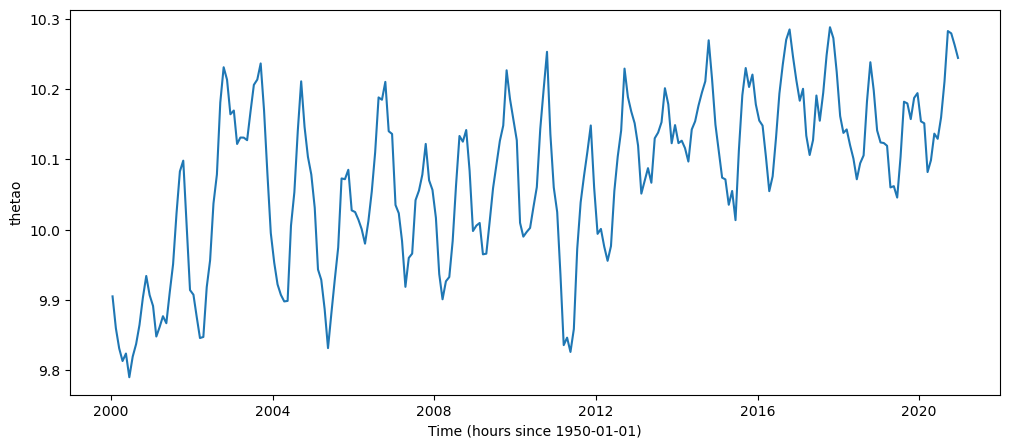

In [19]:
data24N_2000.thetao.mean('depth').mean('lon').plot()

In [ ]:
data24N.to_netcdf('./Data/GLORYS_interp_24N.nc')